## Importing Libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.preprocessing import MinMaxScaler
from math import sqrt

In [2]:
data = pd.read_csv('Football_NN.csv')
data.head()

,play_id,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
0,269,3,95,3397,2,1,2.0,15,4,1,0,0,0,0,1,0,0,0
1,486,6,99,3230,4,1,1.0,10,6,1,0,0,0,1,0,0,0,0
2,675,12,66,3099,6,1,1.0,10,6,0,0,0,0,0,1,0,0,0
3,697,13,60,3070,6,1,2.0,4,3,1,0,0,0,0,1,0,0,0
4,718,14,57,3030,6,1,3.0,1,0,1,0,0,0,0,1,0,0,0


## Data Cleaning and Preparation

In [3]:
data.drop('play_id', axis=1, inplace=True) 

### Checking for null values


In [4]:
data.isnull().values.sum()

11

In [5]:
data[data.isnull().any(axis=1)]

,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
682,89,2,2,20,4,NaN,0,0,0,0,0,0,0,1,0,0,1
818,17,1,2964,2,1,NaN,0,0,0,0,0,0,0,1,0,0,6
844,97,2,121,19,4,NaN,0,0,0,0,0,0,0,1,0,0,-5
872,64,1,591,15,4,NaN,0,2,0,0,0,0,0,1,0,0,-6
1208,30,1,2383,6,2,NaN,0,2,0,0,0,0,0,1,0,0,14
1467,55,2,830,11,4,NaN,0,2,0,0,0,0,0,1,0,0,3
1927,55,1,1575,16,3,NaN,0,2,0,0,0,0,0,1,0,0,-14
2873,110,2,0,25,4,NaN,0,2,0,0,0,0,0,1,0,0,0
3576,78,2,476,18,4,NaN,0,2,0,0,0,0,0,1,0,0,14
3905,14,1,3246,1,1,NaN,0,0,0,0,0,0,0,1,0,0,6


Dropping rows with NaN. Total number of rows missing values is only 11, which is significantly small compared to total number of rows 5298. Removing 11 rows will not have significant drop is accuracy of our model 

In [6]:
data.dropna( axis = 0, inplace = True)
data.isnull().values.sum()

0

In [7]:
data.describe()

,PlayOfGame,yardline_100,game_seconds_remaining,drive,qtr,down,ydstogo,yards_gained,shotgun,no_huddle,qb_dropback,Run To Left,Run To Right,Run Gap Center,Run Gap End,Run Gap Middle Right,score_differential_post
count,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000
mean,42.062417,50.228107,1811.628145,11.160583,2.501797,1.566106,8.192737,4.660299,0.512578,0.062796,0.065444,0.358615,0.373558,0.267827,0.234727,0.265179,0.321922
std,25.762571,25.068196,1048.457357,6.689518,1.131676,0.728929,3.825225,6.483979,0.499889,0.242618,0.247330,0.479639,0.483794,0.442869,0.423868,0.441470,10.998711
min,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-39.000000
25%,19.000000,31.000000,900.000000,5.000000,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-7.000000
50%,41.000000,53.000000,1800.000000,11.000000,3.000000,1.000000,10.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,72.000000,2724.000000,17.000000,4.000000,2.000000,10.000000,6.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,7.000000
max,117.000000,99.000000,3600.000000,31.000000,5.000000,4.000000,35.000000,88.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,49.000000


Now we have numerical dataset ready to use to built a model, we will first start by seperating targeting variable from independent variables. 

In [8]:
X = data.drop(columns='yards_gained')
y = data.yards_gained

### Spliting Dataset
Spliting into train and test set in 7:3 ratio

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 21)

In [10]:
K = [1, 2, 5, 10]
for k in K:
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_train) #make prediction on test set
    RMSE = sqrt(mean_squared_error(y_train , pred))
    print("RMSE of Model is    : {:.3f}"
          .format(RMSE), "when value of k is", k)
    print()

RMSE of Model is    : 0.290 when value of k is 1

RMSE of Model is    : 4.409 when value of k is 2

RMSE of Model is    : 5.731 when value of k is 5

RMSE of Model is    : 6.143 when value of k is 10



Above prediction is close to perfect when K is 1 (single neighbor), however above prediction was on training set and it is expected to have high accuracy. To make sure good result above is not due to overfitting, we will now test the model with testing set. 

In [11]:
K = [1, 2, 5, 10, 20]
for k in K:
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    RMSE = sqrt(mean_squared_error(y_test , pred))
    print("RMSE of Model is    : {:.3f}"
          .format(RMSE), "when value of k is", k)
    print()

RMSE of Model is    : 9.572 when value of k is 1

RMSE of Model is    : 7.858 when value of k is 2

RMSE of Model is    : 7.085 when value of k is 5

RMSE of Model is    : 6.674 when value of k is 10

RMSE of Model is    : 6.461 when value of k is 20



## Cross Validation 
Using Cross validation prediction method on complete dataset

In [12]:
K = [1, 2, 5, 10]
for k in K:
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, X, y, cv=5)
    RMSE = sqrt(mean_squared_error(y , y_pred))
    print("RMSE of Model is    : {:.3f}"
          .format(RMSE), "when value of k is", k)
    print()


RMSE of Model is    : 9.022 when value of k is 1

RMSE of Model is    : 7.779 when value of k is 2

RMSE of Model is    : 7.021 when value of k is 5

RMSE of Model is    : 6.736 when value of k is 10



## Feature selection 

In above model, we use all the feature avaiable in dataset. To improve our model accuracy, we can evualate the feature important to target variable and only use important feature in Knn model. 

We will evaluate correlation coefficients between target variable and independent variables.

In [13]:
abs(data.corr()["yards_gained"])

PlayOfGame                 0.006797
yardline_100               0.109934
game_seconds_remaining     0.002239
drive                      0.004059
qtr                        0.001386
down                       0.017062
ydstogo                    0.084169
yards_gained               1.000000
shotgun                    0.076844
no_huddle                  0.008392
qb_dropback                0.106822
Run To Left                0.036077
Run To Right               0.012007
Run Gap Center             0.025956
Run Gap End                0.061783
Run Gap Middle Right       0.040231
score_differential_post    0.015041
Name: yards_gained, dtype: float64

We now evaluate Absolute value of correlation coefficient and select feature with highest correlation with target variable yards_gained. 
The selected features are ydstogo, yardline_100, shotgun, qb_dropback, Run Gap End

In [14]:
XF = X[['ydstogo','yardline_100','shotgun','qb_dropback', 'Run Gap End']]
XF.describe()

,ydstogo,yardline_100,shotgun,qb_dropback,Run Gap End
count,5287.000000,5287.000000,5287.000000,5287.000000,5287.000000
mean,8.192737,50.228107,0.512578,0.065444,0.234727
std,3.825225,25.068196,0.499889,0.247330,0.423868
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,31.000000,0.000000,0.000000,0.000000
50%,10.000000,53.000000,1.000000,0.000000,0.000000
75%,10.000000,72.000000,1.000000,0.000000,0.000000
max,35.000000,99.000000,1.000000,1.000000,1.000000


Spliting selected feature dataframe XF with same random state

In [15]:
X_train, X_test, y_train, y_test = train_test_split(XF, y, test_size=0.3, random_state= 21)

In [16]:
K = [1, 2, 5, 10]
for k in K:
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_train) #make prediction on test set
    RMSE = sqrt(mean_squared_error(y_train , pred))
    R2 = r2_score(y_train , pred)
    print("RMSE of Model is    : {:.3f}"
          .format(RMSE), "when value of k is", k)
  
    print()

RMSE of Model is    : 7.076 when value of k is 1

RMSE of Model is    : 6.236 when value of k is 2

RMSE of Model is    : 6.109 when value of k is 5

RMSE of Model is    : 6.205 when value of k is 10



Now we will evaluate the model again with testing dataset

In [17]:
K = [1, 2, 5, 10]
for k in K:
    model = KNeighborsRegressor(n_neighbors = k)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    RMSE = sqrt(mean_squared_error(y_test , pred))
    R2 = r2_score(y_test , pred)
    print("RMSE of Model is    : {:.3f}"
          .format(RMSE), "when value of k is", k)
    print()

RMSE of Model is    : 9.791 when value of k is 1

RMSE of Model is    : 8.031 when value of k is 2

RMSE of Model is    : 6.878 when value of k is 5

RMSE of Model is    : 6.576 when value of k is 10



Now we will test RMSE error for different value of K to identify value k which produce best result

Text(0.5, 1.0, 'Change of RMSE at different K')

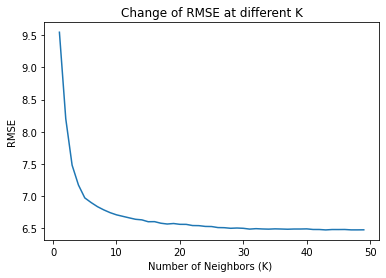

In [18]:
error = []
for k in range(1,50):
    knn = KNeighborsRegressor(n_neighbors=k)
    y_pred = cross_val_predict(knn, XF, y, cv=5)
    error.append(sqrt(mean_squared_error(y,y_pred))) 
plt.plot(range(1,50),error)
plt.xlabel('Number of Neighbors (K) ')  
plt.ylabel('RMSE')  
plt.title("Change of RMSE at different K") 

Improvement of RMSE value is insignificant above 15 nearest neighbhor, hence we consider k=15 as optimal point.\
\
**Please refer report file for more details of analysis**